In [ ]:
Important needed libraries

# Important needed libraries

In [ ]:
# !pip install numpy
# !pip install scipy pandas seaborn matplotlib
# !pip install statsmodels
import numpy as np
import scipy as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import PIL





### implement CNN model

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Regularization - Dropout layers
model.add(Dropout(0.2))
model.add(Flatten())

# Dense layers for classification
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


C:\Users\Vacha Soni\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         294,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 397,060 (1.51 MB)

 Trainable params: 397,060 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # normalize pixel values to [0,1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
import PIL.Image

# Augmentation

In [ ]:
import os
from PIL import Image

# # # Define the source and output directories
##augmentation

#directory containing your original images
#source_training = "C:/Users/Vacha Soni/Downloads/archive (12)/Training/glioma"

#define the path to the directory where the augmented images will be saved
#output_training = "C:/Users/Vacha Soni/Downloads/archive (12)/Training_new/glioma"

#aumentation for testing
#source_testing= "C:/Users/Vacha Soni/Downloads/archive (12)/Testing/glioma"
#output_testing = "C:/Users/Vacha Soni/Downloads/archive (12)/Testing_new/glioma"

# Create the output directory if it does not exist
#if not os.path.exists(output_test):
    #os.makedirs(output_test)

# Define the rotation angles
#rotation_angles = [45, 90, 180, 360]

# Loop through each file in the source directory
#for filename in os.listdir(source_test):
    #if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for common image file extensions
        # Construct the full file paths
        #file_path = os.path.join(source_test, filename)
        # Open the image
        #image = Image.open(file_path)

        # Rotate the image by each angle and save the new image
        #for angle in rotation_angles:
            # Rotate the image
            #rotated_image = image.rotate(angle)
            # Construct the new filename
            #ew_filename = f'{os.path.splitext(filename)[0]}_rotated{angle}{os.path.splitext(filename)[1]}'
            # Construct the full path to the new file
            #new_file_path = os.path.join(output_test, new_filename)
            # Check if the file already exists
            #if not os.path.exists(new_file_path):
                # Save the rotated image
                #rotated_image.save(new_file_path)

#print("Image augmentation completed.")



In [ ]:
training_set=train_datagen.flow_from_directory("C:/Users/Vacha Soni/Downloads/archive (12)/Training_new",
                                              target_size=(64,64),
                                              batch_size=32,
                                              class_mode='categorical')


Found 20512 images belonging to 4 classes.


In [ ]:
test_set=test_datagen.flow_from_directory("C:/Users/Vacha Soni/Downloads/archive (12)/Testing_new",
                                              target_size=(64,64),
                                              batch_size=32,
                                               class_mode='categorical')

Found 5244 images belonging to 4 classes.


In [ ]:
history = model.fit(training_set, validation_data=test_set, batch_size=32, epochs=20, verbose=1)

Epoch 1/20


C:\Users\Vacha Soni\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


641/641 ━━━━━━━━━━━━━━━━━━━━ 215s 325ms/step - accuracy: 0.5017 - loss: 1.1300 - val_accuracy: 0.5402 - val_loss: 1.2524
Epoch 2/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 202s 312ms/step - accuracy: 0.7079 - loss: 0.7419 - val_accuracy: 0.6691 - val_loss: 0.8108
Epoch 3/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 191s 297ms/step - accuracy: 0.7860 - loss: 0.5587 - val_accuracy: 0.7359 - val_loss: 0.6227
Epoch 4/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 198s 307ms/step - accuracy: 0.8207 - loss: 0.4615 - val_accuracy: 0.7900 - val_loss: 0.5061
Epoch 5/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 195s 302ms/step - accuracy: 0.8495 - loss: 0.3972 - val_accuracy: 0.7311 - val_loss: 0.6782
Epoch 6/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 196s 303ms/step - accuracy: 0.8740 - loss: 0.3338 - val_accuracy: 0.8087 - val_loss: 0.5553
Epoch 7/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 204s 316ms/step - accuracy: 0.8884 - loss: 0.2977 - val_accuracy: 0.8198 - val_loss: 0.4955
Epoch 8/20
641/641 ━━━━━━━━━━━━━━━━━━━━ 196s 303ms/step - accuracy: 0.8991 - loss: 0.27

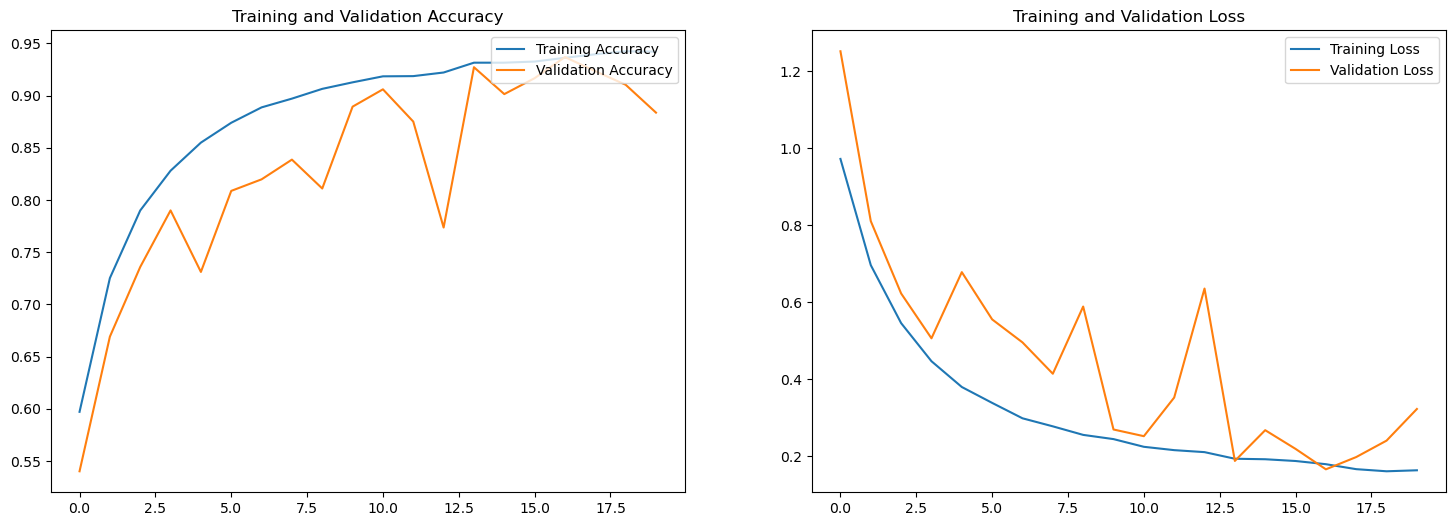

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model.save('Vacha_Final_brain.h5')


In [3]:
model = load_model('Vacha_Final_brain.h5')

In [ ]:
y_pred = model.predict(test_set)

164/164 ━━━━━━━━━━━━━━━━━━━━ 24s 144ms/step


In [ ]:
y_pred

array([[5.2892566e-03, 4.4499493e-01, 5.4506725e-01, 4.6486231e-03],
       [2.6981867e-05, 9.9421293e-01, 1.3926419e-06, 5.7587544e-03],
       [2.4685489e-03, 1.3844128e-01, 1.4748468e-01, 7.1160555e-01],
       ...,
       [5.3228070e-17, 9.9999702e-01, 2.9984990e-06, 4.7857209e-15],
       [9.8947221e-01, 9.5466021e-03, 8.5017720e-04, 1.3090197e-04],
       [1.2401334e-02, 7.2183090e-01, 2.3334979e-01, 3.2417919e-02]],
      dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


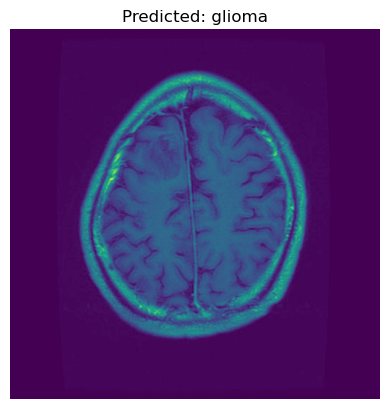

In [4]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

# Load the trained model
model_path = 'Vacha_Final_brain.h5'
try:
    model = load_model(model_path)
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Function to preprocess the uploaded image
def preprocess_image(image_bytes):
    try:
        # Load image from bytes
        img = Image.open(io.BytesIO(image_bytes))
        img = img.convert('RGB')  # Ensure image is in RGB format
        img = img.resize((64, 64))  # Resize image to match model input size
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = img_array / 255.0  # Normalize pixel values (assuming model was trained with normalized data)
        return img_array
    except Exception as e:
        print(f"Error preprocessing image: {e}")
        return None

# Function to predict the class of the uploaded image
def predict_image(image_bytes, model):
    try:
        img_array = preprocess_image(image_bytes)
        if img_array is None:
            return None

        predictions = model.predict(img_array)

        # Map prediction probabilities to class labels
        class_labels = ["glioma", "meningioma", "notumor", "pituitary"]
        predicted_class = class_labels[np.argmax(predictions)]

        return predicted_class
    except Exception as e:
        print(f"Error predicting image: {e}")
        return None

# Example usage (upload an image file and predict)
def predict_uploaded_image(image_path):
    try:
        # Read image file as bytes
        with open(image_path, 'rb') as f:
            image_bytes = f.read()

        # Make prediction
        predicted_class = predict_image(image_bytes, model)
        if predicted_class is None:
            print("Prediction failed. Please check the input image.")
            return

        # Display the uploaded image and predicted class
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Predicted: {predicted_class}')
        plt.show()
    except Exception as e:
        print(f"Error processing image: {e}")

# Example usage: Replace 'path_to_uploaded_image.jpg' with your image file path
predict_uploaded_image("C:/Users/Vacha Soni/Downloads/archive (12)/Testing/glioma/Te-gl_0295.jpg")